  # Apply encoder to morphological profiles to get latent space representations :

# Setup

In [1]:
%load_ext autoreload  
%autoreload 2
from IPython.display import display, HTML, Image
from IPython.core.interactiveshell import InteractiveShell
display(HTML("<style>.container { width:98% !important; }</style>"))
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import os
import sys
# import csv
# import json
# import time
# import types
# import copy
import pprint
import logging
from datetime import datetime
for p in ['./src','../..']:
    if p not in sys.path:
        print(f"insert {p}")
        sys.path.insert(0, p)
print(sys.path)
# import shutil
# import getpass
# import yaml
# import hydra
# from hydra import initialize, initialize_config_module, initialize_config_dir, compose
# from omegaconf import OmegaConf
# from typing import Dict, List, Tuple
# from scipy.sparse import csr_matrix
# from tqdm import tqdm
# import wandb

import numpy as np
import pandas as pd
import scipy
import torch
# import torch.nn.functional as F
# from torchinfo import summary

torch.set_printoptions(precision=None, threshold=None, edgeitems=None, linewidth=150, profile=None, sci_mode=None)


pp = pprint.PrettyPrinter(indent=4)
pd.options.display.width = 132
torch.set_printoptions(precision=None, threshold=None, edgeitems=None, linewidth=150, profile=None, sci_mode=None)
np.set_printoptions(edgeitems=3, infstr='inf', linewidth=150, nanstr='nan')

os.environ["WANDB_NOTEBOOK_NAME"] = "AE-MAIN-SNNL.ipynb"
# os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
# os.environ["CUDA_VISIBLE_DEVICES"] = "2"

insert ./src
insert ../..
['../..', './src', '/home/kevin/miniforge3/envs/ptsnnl/lib/python311.zip', '/home/kevin/miniforge3/envs/ptsnnl/lib/python3.11', '/home/kevin/miniforge3/envs/ptsnnl/lib/python3.11/lib-dynload', '', '/home/kevin/miniforge3/envs/ptsnnl/lib/python3.11/site-packages', '/home/kevin/miniforge3/envs/ptsnnl/lib/python3.11/site-packages/cytominer_eval-0.1-py3.11.egg']


In [3]:
# import snnl.utils as utils
# from snnl.utils import parse_args, load_configuration, set_global_seed, get_device, set_device
from KevinsRoutines.utils.utils_general import list_namespace, save_to_pickle, load_from_pickle

In [4]:
import scipy.stats as sps
import sklearn.metrics as skm
from scipy.spatial.distance import pdist, squareform, euclidean
import matplotlib.pyplot as plt
import seaborn as sb

# from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score, classification_report, precision_recall_fscore_support
# from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_curve, RocCurveDisplay
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
# # Models
# from xgboost import XGBClassifier, XGBRegressor

# import sklearn.metrics as skm
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE

# from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# from sklearn.svm import SVC, SVR
# from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# # utility class to help normalize labels such that they contain only values between 0 and n_classes-1.
# from sklearn.preprocessing import LabelEncoder

# # K-Folds cross-validator - Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).
# # Each fold is then used once as a validation while the k - 1 remaining folds form the training set.
# from sklearn.model_selection import KFold, StratifiedKFold
# from sklearn.model_selection import GroupKFold, StratifiedGroupKFold
# from sklearn.model_selection import ShuffleSplit, GroupShuffleSplit, StratifiedShuffleSplit, TimeSeriesSplit

# # Evaluate metric(s) by cross-validation and also record fit/score times.
# from sklearn.model_selection import cross_validate, cross_val_score

# # Generate cross-validated estimates for each input data point.
# # The data is split according to the cv parameter. Each sample belongs to exactly one test set,
# # and its prediction is computed with an estimator fitted on the corresponding training set.
# from sklearn.model_selection import cross_val_predict

# # Exhaustive search over specified parameter values for an estimator.
# # Randomized search on hyper parameters.
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# # Input checker utility for building a cross-validator.(?)
# from sklearn.model_selection._split import check_cv

# from sklearn.pipeline import Pipeline

# # Make a scorer from a performance metric or loss function. This factory function wraps scoring
# # functions for use in GridSearchCV and cross_val_score. It takes a score function, such as accuracy_score,
# # mean_squared_error, adjusted_rand_score or average_precision_score and returns a callable that
# # scores an estimator’s output. The signature of the call is (estimator, X, y) where estimator
# # is the model to be evaluated, X is the data and y is the ground truth labeling (or None in the
# # case of unsupervised models).
# from sklearn.metrics import make_scorer

# # regression matrics
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # classification metrics
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# # from sklearn.base import BaseEstimator
# # from sklearn.base import ClassifierMixin
# # from sklearn.base import TransformerMixin

# # Construct a new unfitted estimator with the same parameters. Clone does a deep copy of the model
# # in an estimator without actually copying attached data. It returns a new estimator with the same
# # parameters that has not been fitted on any data.
# # from sklearn.base import clone
# from sklearn.preprocessing import StandardScaler


In [6]:
timestamp = datetime.now().strftime('%Y_%m_%d_%H:%M:%S')
logger = logging.getLogger(__name__)
logLevel = os.environ.get('LOG_LEVEL', 'INFO').upper()
FORMAT = '%(asctime)s - %(name)s - %(levelname)s: - %(message)s'
logging.basicConfig(level="INFO", format= FORMAT)

logger.info(f" Excution started : {timestamp} ")
logger.info(f" Pytorch version  : {torch.__version__}")
logger.info(f" Scipy version    : {scipy.__version__}  \t\t Numpy version : {np.__version__}")
logger.info(f" Pandas version: {pd.__version__}  ")


2024-08-05 23:27:35,312 - __main__ - INFO: -  Excution started : 2024_08_05_23:27:35 
2024-08-05 23:27:35,313 - __main__ - INFO: -  Pytorch version  : 2.2.2
2024-08-05 23:27:35,314 - __main__ - INFO: -  Scipy version    : 1.12.0  		 Numpy version : 1.26.4
2024-08-05 23:27:35,315 - __main__ - INFO: -  Pandas version: 2.2.1  


## Helper routines

In [435]:
# model selection (hyperparameter tuning)

def model_selection(model, params_grid, X, y,
                    scoring = None, 
                    cv=5, n_jobs=6, pre_dispatch = None,
                    GridSearch = True, n_iter=20,
                    refit = True, verbose = 0):
    """
    return the refitted model on the whole train data
    input:
    -----
    model:          model to be grid searched
    params_grid:    dictionary of hyperparms to grid search
    X, y:           obvious
    scoring:        scoring Strategy to evaluate the performance of the cross-validated model on the test set.
    cv:             cross-validation fold, integer specifies the number of folds in a (Stratified)KFold,
                    stratified is used if the estimator is a classifier and y is either binary or multiclass
    n_iter          Number of parameter settings that are sampled in RandomizedSearchCV.
                    n_iter trades off runtime vs quality of the solution.
    refit:          Refit an estimator using the best found parameters on the whole dataset.
    """
    print(f" verbose is {verbose}")
    if verbose > 0:
        print(f" params_grid: {params_grid}")
        print(f" scoring    : {scoring}     cv:  {cv}   n_jobs: {n_jobs}   gridsearch: {GridSearch}    n_iter: {n_iter}   refit: {refit}   ")
    if pre_dispatch is None:
        pre_dispatch = n_jobs
    if GridSearch :
        model_train = GridSearchCV(model, params_grid, 
                                   cv=cv, n_jobs=n_jobs,
                                   scoring = scoring, 
                                   pre_dispatch = pre_dispatch,
                                   refit = refit, verbose = verbose)
    else:
        model_train = RandomizedSearchCV(model, param_distributions = params_grid, 
                                         cv=cv, n_jobs=n_jobs, 
                                         n_iter = n_iter,
                                         scoring=scoring,
                                         pre_dispatch = pre_dispatch,
                                         refit = refit, verbose = verbose)

    model_train.fit(X, y)

    print("Best parameters set found on development set:", model_train.best_params_ )
    print("Best score:", model_train.best_score_ )

    print("Grid scores on development set:")
    print()
    means = model_train.cv_results_['mean_test_score']
    stds = model_train.cv_results_['std_test_score']


    for mean, std, params in zip(means, stds, model_train.cv_results_['params']):
        print("%0.5f (+/-%0.03f) for %r" % (mean, std * 2, params))
    return model_train


### main(args)

In [8]:
WANDB_ACTIVE  = False
LATENT_DIM    = 150
HIDDEN_1      = 512
# HIDDEN_2    = '_256'
HIDDEN_2      = ''
DATE          = 'yyyymmdd-hhmm'
LOAD_EPOCH    = 200
EPOCHS        = 5
COMPOUNDS_PER_BATCH = 200
LEARNING_RATE = 1.00e-04
TEMP          = 0.05
TEMP_LR       = 1.00e-05
# RUNMODE       = "baseline"
# CONFIGURATION = "./hyperparameters/ae_cp_150_512_cpb.yaml"
RUNMODE       = "snnl"
CONFIGURATION   = "./hyperparameters/ae_sn_150_512_cpb.yaml"
# CHECKPT       = f"AE_snnl_dcpb{COMPOUNDS_PER_BATCH}_{LATENT_DIM}Ltnt_{HIDDEN_1}{HIDDEN_2}_{DATE}_LAST_ep_{LOAD_EPOCH:03d}.pt"
# CHECKPT       = "AE_snnl_dcpb200_150Ltnt_512_20240709_2235_LAST_ep_700.pt"
# CHECKPT       = "AE_snnl_dcpb200_150Ltnt_512_240709_2235_LAST_ep_705.pt"
# RUN_ID        = "jzt6ecjz"


In [9]:
# ex_runmode = 'baseline'
# ex_runmode = 'base'
# ex_date = "20240709"
# ex_time = "1950"
# indicator = 's'
SNNL_runmode = 'SNNL'
BASE_runmode = 'BASELINE'

base_date = "20240718"
base_time = "1956"
##
snnl_date = "20240718"
snnl_time = "1956"
indicator = 'd'
##
ex_title = f"scpb{COMPOUNDS_PER_BATCH}-{LATENT_DIM}Ltnt"
ex_cpb = 200
suffix = '*'
epochs = 50

In [14]:
# = utils.load_model_from_ckpt(model, ex_mode, ex_timestamp, ex_title, epochs, ex_cpb, ex_factor )
output_file_cols = ['Metadata_Source', 'Metadata_Batch', 'Metadata_Plate', 'Metadata_Well', 'Metadata_JCP2022', 'Metadata_Hash', 'Metadata_Bin', 'Metadata_TPSA', 'Metadata_lnTPSA', 'Metadata_log10TPSA', 'Metadata_Permiation']
output_file_cols += [f'Feature_{x:03d}' for x in range(LATENT_DIM)]
output_path = f"/home/kevin/WSL-shared/cellpainting/cj-datasets/output_11102023/3_sample_embeddings/"
print(len(output_file_cols))

BASELINE_BEST_INPUT_FILE = f"3sample_profiles_embedding_{len(output_file_cols)}_HashOrder_{{runmode}}_{base_date}_{base_time}_BEST_{{datatype}}.csv"
BASELINE_LAST_INPUT_FILE = f"3sample_profiles_embedding_{len(output_file_cols)}_HashOrder_{{runmode}}_{base_date}_{base_time}_LAST_{{datatype}}.csv"
SNNL_BEST_INPUT_FILE = f"3sample_profiles_embedding_{len(output_file_cols)}_HashOrder_{{runmode}}_{snnl_date}_{snnl_time}_BEST_{{datatype}}.csv"
SNNL_LAST_INPUT_FILE = f"3sample_profiles_embedding_{len(output_file_cols)}_HashOrder_{{runmode}}_{snnl_date}_{sbbl_time}_LAST_{{datatype}}.csv"

print(BASELINE_BEST_INPUT_FILE)
print(SNNL_BEST_INPUT_FILE)

161
3sample_profiles_embedding_161_HashOrder_{runmode}_20240718_1956_BEST_{datatype}.csv
3sample_profiles_embedding_161_HashOrder_{runmode}_20240718_1956_BEST_{datatype}.csv


In [15]:
# BEST_OUTPUT_FILE = BASELINE_BEST_OUTPUT_FILE
# LAST_OUTPUT_FILE = BASELINE_LAST_OUTPUT_FILE

# OUTPUT_FILE = SNNL_LAST_OUTPUT_FILE
INPUT_FILE = SNNL_BEST_INPUT_FILE
for runmode in ['BASELINE', 'SNNL']:
    for datatype in ['train', 'test']:
        print(os.path.join(output_path, INPUT_FILE.format(runmode = runmode, datatype=datatype)))
        # print(os.path.join(output_path, LAST_OUTPUT_FILE.format(datatype=datatype)))

/home/kevin/WSL-shared/cellpainting/cj-datasets/output_11102023/3_sample_embeddings/3sample_profiles_embedding_161_HashOrder_BASELINE_20240718_1956_BEST_train.csv
/home/kevin/WSL-shared/cellpainting/cj-datasets/output_11102023/3_sample_embeddings/3sample_profiles_embedding_161_HashOrder_BASELINE_20240718_1956_BEST_test.csv
/home/kevin/WSL-shared/cellpainting/cj-datasets/output_11102023/3_sample_embeddings/3sample_profiles_embedding_161_HashOrder_SNNL_20240718_1956_BEST_train.csv
/home/kevin/WSL-shared/cellpainting/cj-datasets/output_11102023/3_sample_embeddings/3sample_profiles_embedding_161_HashOrder_SNNL_20240718_1956_BEST_test.csv


# Input 

## Read Embedded Features CSV file

In [16]:
BASE_TRAIN_INPUT = os.path.join(output_path, INPUT_FILE.format(runmode = BASE_runmode ,datatype='train'))
BASE_TEST_INPUT  = os.path.join(output_path, INPUT_FILE.format(runmode = BASE_runmode ,datatype='test'))
SNNL_TRAIN_INPUT = os.path.join(output_path, INPUT_FILE.format(runmode = SNNL_runmode ,datatype='train'))
SNNL_TEST_INPUT  = os.path.join(output_path, INPUT_FILE.format(runmode = SNNL_runmode ,datatype='test'))
BASE_TRAIN_INPUT
BASE_TEST_INPUT 
SNNL_TRAIN_INPUT
SNNL_TEST_INPUT 

'/home/kevin/WSL-shared/cellpainting/cj-datasets/output_11102023/3_sample_embeddings/3sample_profiles_embedding_161_HashOrder_SNNL_20240718_1956_BEST_test.csv'

'/home/kevin/WSL-shared/cellpainting/cj-datasets/output_11102023/3_sample_embeddings/3sample_profiles_embedding_161_HashOrder_SNNL_20240718_1956_BEST_train.csv'

In [17]:
df_test = pd.read_csv(TEST_INPUT )

In [18]:
df_test.info()
df_test.shape
df_test.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34542 entries, 0 to 34541
Columns: 161 entries, Metadata_Source to Feature_149
dtypes: float64(154), int64(2), object(5)
memory usage: 42.4+ MB


(34542, 161)

Index(['Metadata_Source', 'Metadata_Batch', 'Metadata_Plate', 'Metadata_Well', 'Metadata_JCP2022', 'Metadata_Hash', 'Metadata_Bin',
       'Metadata_TPSA', 'Metadata_lnTPSA', 'Metadata_log10TPSA',
       ...
       'Feature_140', 'Feature_141', 'Feature_142', 'Feature_143', 'Feature_144', 'Feature_145', 'Feature_146', 'Feature_147',
       'Feature_148', 'Feature_149'],
      dtype='object', length=161)

In [19]:
df_test.iloc[:5,:13]

,Metadata_Source,Metadata_Batch,Metadata_Plate,Metadata_Well,Metadata_JCP2022,Metadata_Hash,Metadata_Bin,Metadata_TPSA,Metadata_lnTPSA,Metadata_log10TPSA,Metadata_Permiation,Feature_000,Feature_001
0,source_11,Batch2,EC000046,K04,JCP2022_009278,7406361908543180200,8,62.78,4.139637,1.797821,0.0,0.613709,0.704578
1,source_11,Batch2,EC000063,K04,JCP2022_009278,7406361908543180200,8,62.78,4.139637,1.797821,0.0,0.396030,1.886775
2,source_9,20211013-Run14,GR00003281,J15,JCP2022_009278,7406361908543180200,8,62.78,4.139637,1.797821,0.0,0.967456,-0.243835
3,source_5,JUMPCPE-20210908-Run28_20210909_072022,AETJUM107,J10,JCP2022_045457,7406621140030190348,12,33.20,3.502550,1.521138,0.0,-0.355203,0.057036
4,source_11,Batch3,EC000139,G04,JCP2022_045457,7406621140030190348,12,33.20,3.502550,1.521138,0.0,1.246175,0.795314


In [20]:
df_train = pd.read_csv(TRAIN_INPUT)
# df_train = pd.read_csv(TRAIN_INPUT, nrows = 100 )
# df_train = pd.read_csv(TRAIN_INPUT, usecols = ['Metadata_Batch'])

In [615]:
test_y = df_test.iloc[:,10:11].to_numpy().ravel().astype(np.uint8)
test_y.sum()
test_y.shape, type(test_y), test_y.dtype
test_X = df_test.iloc[:,11:].to_numpy()
test_X.shape,type(test_X), test_X.dtype

4164

((34542,), numpy.ndarray, dtype('uint8'))

((34542, 150), numpy.ndarray, dtype('float64'))

In [617]:
df_train.shape
df_train.info()
df_train.iloc[:5,:16]

(312000, 161)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312000 entries, 0 to 311999
Columns: 161 entries, Metadata_Source to Feature_149
dtypes: float64(154), int64(2), object(5)
memory usage: 383.2+ MB


,Metadata_Source,Metadata_Batch,Metadata_Plate,Metadata_Well,Metadata_JCP2022,Metadata_Hash,Metadata_Bin,Metadata_TPSA,Metadata_lnTPSA,Metadata_log10TPSA,Metadata_Permiation,Feature_000,Feature_001,Feature_002,Feature_003,Feature_004
0,source_1,Batch5_20221030,UL001793,M26,JCP2022_006020,-9223347314827979542,10,71.18,4.265212,1.852358,0.0,-0.584816,1.739848,-0.512839,0.171693,-0.277947
1,source_10,2021_06_22_U2OS_48_hr_run8,Dest210622-143628,M04,JCP2022_006020,-9223347314827979542,10,71.18,4.265212,1.852358,0.0,0.072229,4.545980,-0.728832,-6.005501,0.926439
2,source_3,CP_31_all_Phenix1,B040603b,G13,JCP2022_006020,-9223347314827979542,10,71.18,4.265212,1.852358,0.0,1.418385,4.461677,2.481470,-0.635005,-2.307799
3,source_6,p211004CPU2OS48hw384exp031JUMP,110000295562,M08,JCP2022_058905,-9223229703754907651,13,58.65,4.071588,1.768268,0.0,-2.747379,0.744657,2.082911,1.504725,1.156345
4,source_3,CP_32_all_Phenix1,B40003aW,M08,JCP2022_058905,-9223229703754907651,13,58.65,4.071588,1.768268,0.0,0.559964,1.732896,0.296971,-1.477167,1.171373


In [26]:
312000+34542

346542

In [618]:
train_y = df_train.iloc[:,10:11].to_numpy().ravel().astype(np.uint8)
train_y.sum()
train_y.shape, type(train_y), train_y.dtype

train_X = df_train.iloc[:,11:].to_numpy()
train_X.shape,type(train_X) ,train_X.dtype

37164

((312000,), numpy.ndarray, dtype('uint8'))

((312000, 150), numpy.ndarray, dtype('float64'))

## Standardize inputs

In [619]:
print(f"Train_X :  Min: {train_X.min():.4f}    Max: {train_X.max():.4f}   Mean: {train_X.mean():.4f}  Std: {train_X.std():.4f}")
print(f"Test_X  :  Min: {test_X.min():.4f}    Max: {test_X.max():.4f}    Mean: {test_X.mean():.4f}  Std: {test_X.std():.4f}")

Train_X :  Min: -72.2029    Max: 103.8641   Mean: 0.0527  Std: 2.5164
Test_X  :  Min: -53.3835    Max: 71.4748    Mean: 0.0529  Std: 2.4997


In [620]:
# print(f"Train_X :  Min: {train_X.min():.4f}    Max: {train_X.max():.4f}   Mean: {train_X.mean():.4f}  Std: {train_X.std():.4f}")
# print(f"Test_X  :  Min: {test_X.min():.4f}    Max: {test_X.max():.4f}    Mean: {test_X.mean():.4f}  Std: {test_X.std():.4f}")

In [621]:
scaler = StandardScaler(copy = True)
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [622]:
print("After Standard Scaler Transformation")
print(f"Train_X :  Min: {train_X.min():.4f}    Max: {train_X.max():.4f}   Mean: {train_X.mean():.4f}  Std: {train_X.std():.4f}")
print(f"Test_X  :  Min: {test_X.min():.4f}    Max: {test_X.max():.4f}    Mean: {test_X.mean():.4f}  Std: {test_X.std():.4f}")


After Standard Scaler Transformation
Train_X :  Min: -33.4514    Max: 27.3319   Mean: -0.0000  Std: 1.0000
Test_X  :  Min: -24.2626    Max: 28.1195    Mean: 0.0003  Std: 0.9889


In [623]:
label_counts([("Training", train_y), ("Test", test_y)])
# for grp_name, labels in [("Training", train_y), ("Test", test_y)]:
#     bcnt = np.bincount(labels.astype(np.int64))
#     print(f" {grp_name}")
#     print(f" Total samples: {bcnt.sum()}")
#     print(f" Label 0: {bcnt[0]:>7d}      % {bcnt[0]*100/bcnt.sum():2.2f} ")
#     print(f" Label 0: {bcnt[1]:>7d}      % {bcnt[1]*100/bcnt.sum():2.2f} ")
#     print("")

 Training
 Total samples: 312000
 Label 0: 274,836      % 88.09 
 Label 1:  37,164      % 11.91 

 Test
 Total samples: 34542
 Label 0:  30,378      % 87.95 
 Label 1:   4,164      % 12.05 



## Modify TPSA Threshold

In [269]:
train_y_72 = np.zeros_like(train_y)
train_y_72.shape[0]/3

104000.0

In [42]:
print(f"                  min           max           std          mean           median")
for x in ['TPSA', 'lnTPSA', 'log10TPSA']:
    print(f"{x:12s} {df_train[x].min():13.7f} {df_train[x].max():13.7f} {df_train[x].std():13.7f} {df_train[x].mean():13.7f} {df_train[x].median():13.7f}") 

df_train.TPSA.count()
df_train[df_train.TPSA >= THRESHOLD].TPSA.count()/df_train.TPSA.count()
df_train[df_train.TPSA < THRESHOLD].TPSA.count()/df_train.TPSA.count()


                  min           max           std          mean           median
TPSA             3.2400000  2834.6700000    32.8859880    73.6213196    71.3600000
lnTPSA           1.1755733     7.9496808     0.3917724     4.2261118     4.2677375
log10TPSA        0.5105450     3.4525025     0.1701446     1.8353770     1.8534548


116691

0.12232305833354758

0.8776769416664524

In [203]:
_tmp = df_train.Metadata_Permiation.value_counts()
_tmp[0], _tmp[1]

(274836, 37164)

In [264]:
for threshold in [68, 69, 70, 71, 72, 100]:
    _tmp = (df_train['Metadata_TPSA'] >= threshold).value_counts()
    print(f"\n TPSA threshold {threshold} \n Total samples: {_tmp.sum()}")
    print(f" Label 0: {_tmp[False]:>7d}      % {_tmp[False]*100/_tmp.sum():2.2f} ")
    print(f" Label 1: {_tmp[True]:>7d}      % {_tmp[True]*100/_tmp.sum():2.2f} ")


 TPSA threshold 68 
 Total samples: 312000
 Label 0:  138900      % 44.52 
 Label 1:  173100      % 55.48 

 TPSA threshold 69 
 Total samples: 312000
 Label 0:  144249      % 46.23 
 Label 1:  167751      % 53.77 

 TPSA threshold 70 
 Total samples: 312000
 Label 0:  149058      % 47.77 
 Label 1:  162942      % 52.23 

 TPSA threshold 71 
 Total samples: 312000
 Label 0:  154125      % 49.40 
 Label 1:  157875      % 50.60 

 TPSA threshold 72 
 Total samples: 312000
 Label 0:  160203      % 51.35 
 Label 1:  151797      % 48.65 

 TPSA threshold 100 
 Total samples: 312000
 Label 0:  274836      % 88.09 
 Label 1:   37164      % 11.91 


In [265]:
# fig, ax = plt.subplots(figsize=(4,4))
# fig.canvas.draw()  # Need to draw the figure to define renderer
# ax.set_title("AngleLabel example")
# # Plot two crossing lines and label each angle between them with the above
# center = (4.5, 650)
# p1 = [(2.5, 710), (6.0, 605)]
# p2 = [(3.0, 275), (5.5, 900)]
# line1, = ax.plot(*zip(*p1))
# line2, = ax.plot(*zip(*p2))
# point, = ax.plot(*center, marker="o")


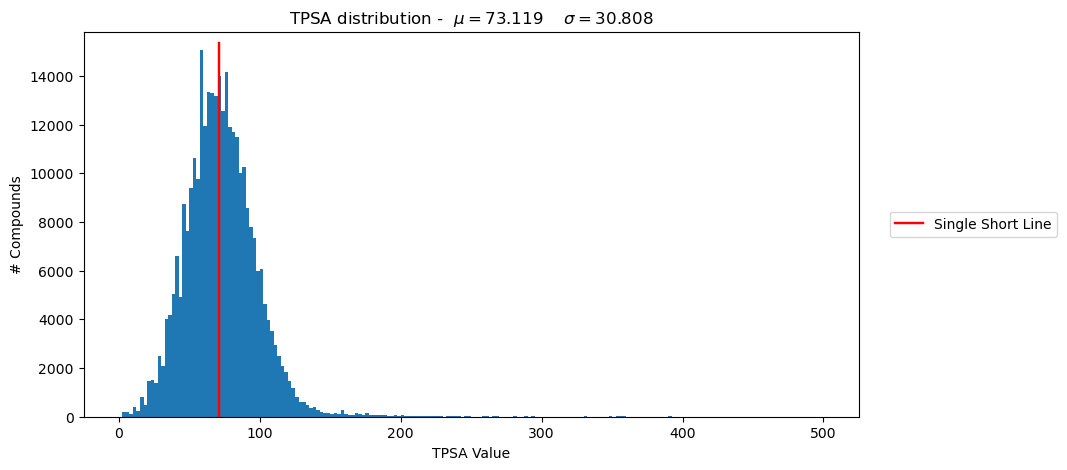

In [259]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
num_bins = 200
# fig, ax = plt.subplots()
fig = plt.figure(figsize=(10,5))
sigma = df_train.Metadata_TPSA.std()
mu = df_train.Metadata_TPSA.mean()
med = df_train.Metadata_TPSA.median()
# the histogram of the data
# We can set the number of bins with the *bins* keyword argument.
n, bins, patches = plt.hist(df_train.Metadata_TPSA, num_bins, density=False, range=[0, 500],)
# p1 = [(med, 710), (6.0, 605)]
# _ = plt.vlines(x=med, ymin=10, ymax=17000, colors='red', linestyles='-', lw=1.75, label='Single Short Line')
_ = plt.axvline(x=med, ymin=0, ymax=.97, color='red', linestyle='-', lw=1.75, label='Single Short Line')
_ = plt.xlabel('TPSA Value');
_ = plt.ylabel('# Compounds');
_ = plt.title(fr'TPSA distribution -  $\mu={mu:.3f}$    $\sigma={sigma:.3f}$')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
# axs[1].hist(dist2, bins=n_bins)
plt.show()

## Stratified CV data splits

In [260]:
def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots(figsize=(10,5))
    ax.scatter(
        range(len(groups)),
        [0.5] * len(groups),
        c=groups,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.scatter(
        range(len(groups)),
        [3.5] * len(groups),
        c=classes,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.set(
        ylim=[-1, 5],
        yticks=[0.5, 3.5],
        yticklabels=["Data\ngroup", "Data\nclass"],
        xlabel="Sample index",
    )

In [261]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""
    use_groups = "Group" in type(cv).__name__
    groups = group if use_groups else None
    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=groups)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, 100],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch


In [ ]:
rng = np.random.RandomState(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

# Generate the class/group data
# n_points = 100
# X = rng.randn(100, 10)

# percentiles_classes = [0.1, 0.3, 0.6]
# y = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

In [ ]:
# Generate uneven groups

# group_prior = rng.dirichlet([2] * 10)
# group_prior.sum()
# group_prior

# groups = np.repeat(np.arange(10), rng.multinomial(100, group_prior))
# groups.shape
# groups

In [ ]:
groups = np.repeat(0, train_X.shape[0])
groups.shape

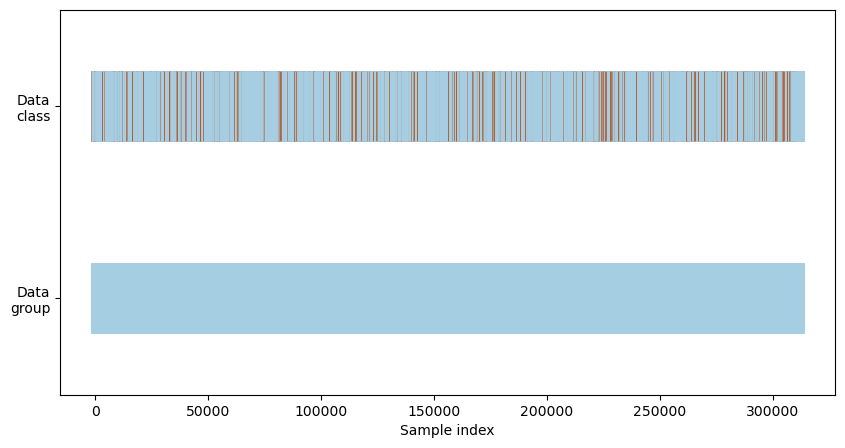

In [84]:
visualize_groups(train_y, groups, "no groups")

In [88]:
n_splits = 5
groups = None

/tmp/ipykernel_4107164/1298143750.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


<Axes: title={'center': 'KFold'}, xlabel='Sample index', ylabel='CV iteration'>

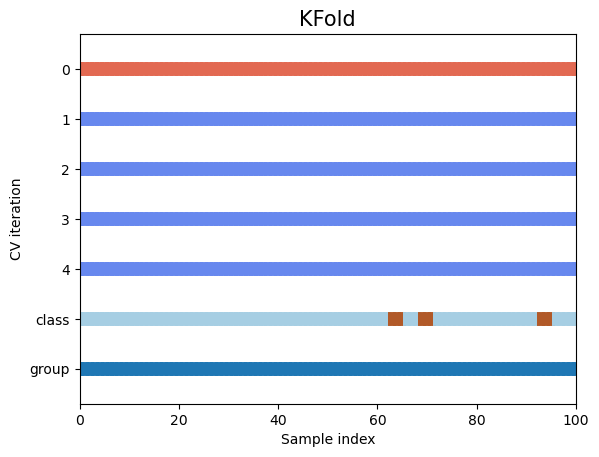

In [89]:
fig, ax = plt.subplots()
cv = KFold(n_splits)
plot_cv_indices(cv, train_X, train_y, groups, ax, n_splits)

## Create balanced datasets

In [634]:
def balance_datasets(X,y, ratio = 2, verbose = False):
    y = y.astype(np.uint8)
    neg_idxs = np.nonzero([y == 0])[1]
    pos_idxs = np.nonzero([y == 1])[1]
    pos_idxs = np.array(pos_idxs)
    # print(f"\n # Pos rows: {len(pos_idxs)}   # Neg rows: {len(neg_idxs)}  Total: {len(pos_idxs)+ len(neg_idxs)}")
    # print(f" # Pos compounds: {len(pos_idxs)//3}   # Neg compounds: {len(neg_idxs)//3}  total: {(len(pos_idxs) + len(neg_idxs))//3}")
    # print(f"\n pos indexes - len: {len(pos_idxs)}")
    # print( pos_idxs[:50])
    # print( pos_idxs[-50:])
    # print(f"\n neg indexes - len: {len(neg_idxs)}")
    # print(neg_idxs[:50])
    # print(neg_idxs[-50:])
    
    stepped_pos_idxs = [x for x in pos_idxs if x % 3 == 0]
    stepped_neg_idxs = [x for x in neg_idxs if x % 3 == 0]
    stepped_neg_idxs = np.array(stepped_neg_idxs)
    pos_counts = len(stepped_pos_idxs)
    neg_counts = len(stepped_neg_idxs)
    
    if verbose:
        print(f"\n # Pos counts: {pos_counts}    # Neg counts: {neg_counts}   Total: {pos_counts+neg_counts}")
        print(f"\n pos indexes - len: {pos_counts}")
        print(stepped_pos_idxs[:25])
        print(stepped_pos_idxs[-25:])
        print(f"\n neg indexes - len: {neg_counts}")
        print(stepped_neg_idxs[:25])
        print(stepped_neg_idxs[-25:])
        print()
    num_neg_samples = ratio * pos_counts
    
    print(f"\n Take {pos_counts} samples from total of {pos_counts} negative training samples")
    print(f" Take {num_neg_samples} samples from total of {neg_counts} negative training samples")
    sample_idxs = skr.sample_without_replacement(n_population=neg_counts, n_samples= num_neg_samples, )
    sample_idxs.sort()
    neg_sample_idxs = stepped_neg_idxs[sample_idxs]
    if verbose:
        print(f"\n Sample indxs - len: {len(sample_idxs)}")
        print(f" {sample_idxs[:20]}")
        print(f" {sample_idxs[-20:]}")
        print(f"\n neg_sample_idxs: {len(neg_sample_idxs)}")
        print(f"{neg_sample_idxs[:20]}")
        print(f"{neg_sample_idxs[-20:]}")
        print()
        print(neg_sample_idxs[:20])
        print(neg_sample_idxs[:20]+1)
        print(neg_sample_idxs[:20]+2)
    
    neg_sample_idxs_3 = np.concatenate((neg_sample_idxs, neg_sample_idxs+1, neg_sample_idxs+2))
    neg_sample_idxs_3.sort()
    if verbose:
        print(f"\n pos_sample_idxs_3: {len(pos_idxs)}")
        print(f" [:20] :{pos_idxs[:20]}")
        print(f" [-20:] {pos_idxs[-20:]}")
        print(f"\n neg_sample_idxs_3: {len(neg_sample_idxs_3)}")
        print(f" [:20] :{neg_sample_idxs_3[:20]}")
        print(f" [-20:] {neg_sample_idxs_3[-20:]}")
    
    balanced_ds_idxs = np.concatenate((pos_idxs, neg_sample_idxs_3))

    bal_X = X[balanced_ds_idxs]
    bal_y = y[balanced_ds_idxs]

    print(f"\n Balanced Dataset: # pos samples: {len(pos_idxs)}    # Neg samples: {len(neg_sample_idxs_3)}  Total len: {len(balanced_ds_idxs)}")   
    print(f"\n X :  Min: {bal_X.min():.4f}    Max: {bal_X.max():.4f}   Mean: {bal_X.mean():.4f}  Std: {bal_X.std():.4f}")
    print(f" y :  Min: {bal_y.min():.4f}    Max: {bal_y.max():.4f}   Mean: {bal_y.mean():.4f}  Std: {bal_y.std():.4f}")
    return bal_X,bal_y

In [635]:
bal_train_X, bal_train_y = balance_datasets(train_X, train_y, ratio = 1)
bal_train_X_2, bal_train_y_2 = balance_datasets(train_X, train_y, ratio = 2)


 Take 12388 samples from total of 12388 negative training samples
 Take 12388 samples from total of 91612 negative training samples

 Balanced Dataset: # pos samples: 37164    # Neg samples: 37164  Total len: 74328

 X :  Min: -27.6719    Max: 23.7271   Mean: 0.0016  Std: 1.0157
 y :  Min: 0.0000    Max: 1.0000   Mean: 0.5000  Std: 0.5000

 Take 12388 samples from total of 12388 negative training samples
 Take 24776 samples from total of 91612 negative training samples

 Balanced Dataset: # pos samples: 37164    # Neg samples: 74328  Total len: 111492

 X :  Min: -27.3326    Max: 26.3826   Mean: 0.0014  Std: 1.0076
 y :  Min: 0.0000    Max: 1.0000   Mean: 0.3333  Std: 0.4714


In [636]:
bal_test_X, bal_test_y = balance_datasets(test_X, test_y, ratio = 1)
bal_test_X_2, bal_test_y_2 = balance_datasets(test_X, test_y, ratio = 2)


 Take 1388 samples from total of 1388 negative training samples
 Take 1388 samples from total of 10126 negative training samples

 Balanced Dataset: # pos samples: 4164    # Neg samples: 4164  Total len: 8328

 X :  Min: -16.9431    Max: 19.0416   Mean: 0.0030  Std: 1.0028
 y :  Min: 0.0000    Max: 1.0000   Mean: 0.5000  Std: 0.5000

 Take 1388 samples from total of 1388 negative training samples
 Take 2776 samples from total of 10126 negative training samples

 Balanced Dataset: # pos samples: 4164    # Neg samples: 8328  Total len: 12492

 X :  Min: -18.7677    Max: 20.9524   Mean: 0.0015  Std: 0.9780
 y :  Min: 0.0000    Max: 1.0000   Mean: 0.3333  Std: 0.4714


# Model definitions

# Neural Net Model 

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
from torchinfo import summary
torch.set_printoptions(precision=None, threshold=None, edgeitems=None, linewidth=180, profile=None, sci_mode=None)
## Set visible GPU device 
##----------------------------------------------
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
# os.environ["CUDA_VISIBLE_DEVICES"] = '0'

if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

device

device(type='cuda', index=0)

In [8]:
@torch.no_grad()
def validation(val_steps=50):
    loss = 0
    for i in range(val_steps):
        ix = torch.randint(0, val_X.shape[0], (batch_size,))
        Xv, Yv = torch.Tensor(val_X[ix]).to(device), torch.Tensor(val_y[ix]).to(device) # batch X,Y
        logits = model(Xv)
        loss += F.mse_loss(logits, Yv)
    loss /= val_steps
    return loss 

# import torchmetrics 
# evaluate the loss
@torch.no_grad() # this decorator disables gradient tracking inside pytorch
def split_loss(split):
    """
    compute loss for data split passed (training, validation, or test data)
    """
#     from torch.torcheval.metrics import R2Score    
    from torchmetrics.regression import R2Score, PearsonCorrCoef
    x_numpy,y_numpy = {
    'train': (train_X, train_y),
    'val'  : (val_X  , val_y),
    'test' : (test_X , test_y),
    }[split]
    x = torch.Tensor(x_numpy).to(device)
    y = torch.Tensor(y_numpy).to(device) 
    logits = model(x)
#     print(f" size of logits: {logits.shape}   size of y: {y.shape}")
    mse_loss = F.mse_loss(logits, y)
    r2score = R2Score().to(device)
    pearson = PearsonCorrCoef(num_outputs=1).to(device)
    r2_loss = r2score(logits, y) 
    pearson_loss= pearson(logits.view(-1), y.view(-1))
    print(f"\n {split:5s} data:   MSE loss: {mse_loss.item():10.4f}    R2 Score: {r2_loss.item():.5f}     Pearson Coeff. {pearson_loss:.4f}")
    
@torch.no_grad()
def calc_loss(x,y):
    logits = model(x)
    loss = F.mse_loss(logits, y)
    print(y[:20].T)
    print(logits[:20].T)
    print(f"Calculated loss:  {loss.item():5e}")
    

In [9]:
try:
    del model
except:
    pass

In [10]:
# hierarchical network
#  nn.Linear(n_hidden_2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
# del model

n_input    = 150 # the dimensionality of the character embedding vectors
n_hidden_1 = 128 # the number of neurons in the hidden layer of the MLP
n_hidden_2 = 128 # the number of neurons in the hidden layer of the MLP
model = nn.Sequential(
    nn.Linear(n_input , n_hidden_1, bias=False), 
    nn.BatchNorm1d(n_hidden_1), 
    nn.Tanh(),
    nn.Linear(n_hidden_1, n_hidden_2, bias=False), 
    nn.BatchNorm1d(n_hidden_2), 
    nn.Tanh(),
    nn.Linear(n_hidden_2, 1),
)
model.to(device)

Sequential(
  (0): Linear(in_features=150, out_features=128, bias=False)
  (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Tanh()
  (3): Linear(in_features=128, out_features=128, bias=False)
  (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): Tanh()
  (6): Linear(in_features=128, out_features=1, bias=True)
)

In [23]:
print(model)
# print(type(model[-1]))
for i, layer in enumerate(model):
    print('-'*90)
    print(f"layer {i}: {layer}")
    print('-'*90)
    if isinstance(layer, nn.Linear):
        # layer.__dict__
        layer.weight.shape
        layer.weight
        if layer.bias is not None:
            layer.bias.shape
            layer.bias

Sequential(
  (0): Linear(in_features=150, out_features=128, bias=False)
  (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Tanh()
  (3): Linear(in_features=128, out_features=128, bias=False)
  (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): Tanh()
  (6): Linear(in_features=128, out_features=1, bias=True)
)
------------------------------------------------------------------------------------------
layer 0: Linear(in_features=150, out_features=128, bias=False)
------------------------------------------------------------------------------------------


torch.Size([128, 150])

Parameter containing:
tensor([[-0.0378, -0.0755,  0.0457,  ..., -0.0592,  0.0092,  0.0053],
        [-0.0808, -0.0480,  0.0654,  ..., -0.0006,  0.0253, -0.0101],
        [-0.0697,  0.0075, -0.0133,  ...,  0.0763, -0.0627,  0.0024],
        ...,
        [ 0.0255, -0.0792,  0.0688,  ..., -0.0755, -0.0475,  0.0269],
        [ 0.0573,  0.0181,  0.0477,  ...,  0.0149, -0.0415,  0.0438],
        [ 0.0176, -0.0357, -0.0255,  ..., -0.0312, -0.0376,  0.0421]], device='cuda:0', requires_grad=True)

------------------------------------------------------------------------------------------
layer 1: BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
layer 2: Tanh()
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
layer 3: Linear(in_features=128, out_features=128, bias=False)
------------------------------------------------------------------------------------------


torch.Size([128, 128])

Parameter containing:
tensor([[-0.0433, -0.0263, -0.0359,  ...,  0.0053,  0.0587, -0.0498],
        [ 0.0863, -0.0242,  0.0036,  ..., -0.0522,  0.0150, -0.0691],
        [-0.0162,  0.0058,  0.0665,  ...,  0.0605, -0.0106,  0.0714],
        ...,
        [ 0.0184,  0.0880,  0.0258,  ..., -0.0124, -0.0272,  0.0495],
        [ 0.0514, -0.0685, -0.0572,  ...,  0.0770, -0.0326,  0.0461],
        [ 0.0506,  0.0792,  0.0092,  ...,  0.0861, -0.0593, -0.0630]], device='cuda:0', requires_grad=True)

------------------------------------------------------------------------------------------
layer 4: BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
layer 5: Tanh()
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
layer 6: Linear(in_features=128, out_features=1, bias=True)
------------------------------------------------------------------------------------------


torch.Size([1, 128])

Parameter containing:
tensor([[ 3.2355e-05, -8.5638e-05, -4.7210e-05,  5.1546e-05,  8.0051e-05, -3.8740e-05, -2.5618e-05, -3.8152e-05,  3.5455e-05,  9.2917e-06, -5.0927e-05, -2.8379e-05, -7.1641e-05,
         -7.4132e-05, -2.2444e-05, -3.2088e-05, -1.9096e-05, -6.3730e-05,  6.4556e-05, -5.4213e-05,  4.7789e-06,  7.5579e-05, -4.8166e-05,  5.9376e-05,  5.7375e-05, -8.6694e-05,
          4.1954e-05,  6.3671e-05,  3.6093e-05,  3.1687e-05, -2.4955e-07,  6.6022e-05,  5.3165e-05, -2.7712e-07,  2.7265e-05, -2.7724e-05, -4.9875e-05, -4.9622e-05,  4.6541e-06,
         -8.4543e-05,  6.0771e-06,  5.8673e-05, -1.6071e-05,  7.3634e-05,  1.8176e-06,  2.8855e-05, -1.7629e-05,  7.2590e-05, -6.8730e-05, -8.1912e-05,  6.7641e-05, -8.5236e-05,
         -6.3898e-05, -4.0830e-05, -6.9300e-06,  3.7249e-05,  7.2675e-05, -8.5057e-05,  4.4539e-05, -8.4051e-06, -1.1069e-06, -3.9544e-05, -3.5207e-05,  7.4578e-05, -3.5048e-05,
         -6.0423e-05,  3.6145e-05, -4.6600e-05,  4.3311e-05,  7.7865e-05, -8.0930e-05, -

torch.Size([1])

Parameter containing:
tensor([-0.0210], device='cuda:0', requires_grad=True)

In [13]:
    
# parameter init
with torch.no_grad():
    model[-1].weight *= 0.1 # last layer make less confident
model[-1].weight

Parameter containing:
tensor([[ 3.2355e-05, -8.5638e-05, -4.7210e-05,  5.1546e-05,  8.0051e-05, -3.8740e-05, -2.5618e-05, -3.8152e-05,  3.5455e-05,  9.2917e-06, -5.0927e-05, -2.8379e-05, -7.1641e-05,
         -7.4132e-05, -2.2444e-05, -3.2088e-05, -1.9096e-05, -6.3730e-05,  6.4556e-05, -5.4213e-05,  4.7789e-06,  7.5579e-05, -4.8166e-05,  5.9376e-05,  5.7375e-05, -8.6694e-05,
          4.1954e-05,  6.3671e-05,  3.6093e-05,  3.1687e-05, -2.4955e-07,  6.6022e-05,  5.3165e-05, -2.7712e-07,  2.7265e-05, -2.7724e-05, -4.9875e-05, -4.9622e-05,  4.6541e-06,
         -8.4543e-05,  6.0771e-06,  5.8673e-05, -1.6071e-05,  7.3634e-05,  1.8176e-06,  2.8855e-05, -1.7629e-05,  7.2590e-05, -6.8730e-05, -8.1912e-05,  6.7641e-05, -8.5236e-05,
         -6.3898e-05, -4.0830e-05, -6.9300e-06,  3.7249e-05,  7.2675e-05, -8.5057e-05,  4.4539e-05, -8.4051e-06, -1.1069e-06, -3.9544e-05, -3.5207e-05,  7.4578e-05, -3.5048e-05,
         -6.0423e-05,  3.6145e-05, -4.6600e-05,  4.3311e-05,  7.7865e-05, -8.0930e-05, -

In [26]:
parameters = model.parameters()
ttl_nelements = 0
for p in parameters:
    print(f"Parm shape: {str(p.shape):35s}    # elements: {p.nelement():8d}    Required gradient calc: {p.requires_grad}")
    ttl_nelements += p.nelement()
print(ttl_nelements)

print(f"Total num of parameters: {sum(p.nelement() for p in model.parameters())}") # number of parameters in total
for p in parameters:
    p.requires_grad = True

col_names = [ "input_size", "output_size", "num_params", "params_percent", "mult_adds", "trainable"]

summary_input_size = (30  , 150)
_ = summary(model, 
        verbose = 2,
        input_size=summary_input_size, col_names = col_names)

# summary(model, 
#         input_size = (1,1032),
#         verbose =2, 
#         col_names = ["input_size", "output_size", "num_params", "params_percent",  "mult_adds","trainable"],
#         col_width=16,
#         row_settings=["var_names"],);

Parm shape: torch.Size([128, 150])                 # elements:    19200    Required gradient calc: True
Parm shape: torch.Size([128])                      # elements:      128    Required gradient calc: True
Parm shape: torch.Size([128])                      # elements:      128    Required gradient calc: True
Parm shape: torch.Size([128, 128])                 # elements:    16384    Required gradient calc: True
Parm shape: torch.Size([128])                      # elements:      128    Required gradient calc: True
Parm shape: torch.Size([128])                      # elements:      128    Required gradient calc: True
Parm shape: torch.Size([1, 128])                   # elements:      128    Required gradient calc: True
Parm shape: torch.Size([1])                        # elements:        1    Required gradient calc: True
36225
Total num of parameters: 36225
Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %     

In [ ]:
torch.manual_seed(42); # seed rng for reproducibility

In [ ]:
start_step = 0
end_step = 200000


In [27]:
# create a PyTorch optimizer
init_LR = 1e-3
curr_LR = init_LR
step_size = 100000
start_step = 0
end_step  = 200000
batch_size = 64
lossi = []
lossv = []

optimizer = torch.optim.AdamW(model.parameters(), lr=init_LR)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = step_size, gamma=0.1, last_epoch= -1 , verbose=False)

/home/kevin/miniforge3/envs/ptsnnl/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [ ]:
model.train();
for i in range(start_step, end_step):
  
    # minibatch construct
    ix = torch.randint(0, train_X.shape[0], (batch_size,))
    Xb, Yb = torch.Tensor(train_X[ix]).to(device), torch.Tensor(train_y[ix]).to(device) # batch X,Y
    
    # forward pass
    logits = model(Xb)
    loss_mse = F.mse_loss(logits, Yb)

    optimizer.zero_grad(set_to_none=True)
    loss_mse.backward()

    optimizer.step()

    lossi.append(loss_mse.log10().item())
    
    scheduler.step()

    # track stats
    if i % 1000 == 0:
        val_loss_mse = validation()
        lossv.append(val_loss_mse.log10().item())
        print(f" {datetime.now().strftime('%X.%f')} | batch: {i:7d}/{end_step:7d} | training loss: {loss_mse.item():11.6f} | validation loss: {val_loss_mse.item():11.6f}") 
    
        if i % 50000 == 0:
            if curr_LR != optimizer.param_groups[0]['lr']:
                curr_LR = optimizer.param_groups[0]['lr']
                print(f" ===> learning rate adjusted to {curr_LR}")        
            model.eval();
            print(f"**{i//50000} iterations**")
            split_loss('train')
            split_loss('val')
            split_loss('test')
            print()
            model.train();

## End of training loop
        
print(f" start_step : {start_step}     end_step: {end_step}    i: {i}")    

model.eval();
split_loss('train')
split_loss('val')
split_loss('test')
model.train();



In [ ]:
# start_step = end_step
# end_step += 50000

In [ ]:
print(f" start_step : {start_step}     end_step: {end_step}     end_step: {end_step - start_step}   i: {i}      learning rate: {optimizer.param_groups[0]['lr']}")    

In [ ]:
# for g in optimizer.param_groups:
#     g['lr']=1e-4
#     print(g)

In [ ]:
print(len(lossi), len(lossv));
# print(lossi[0], lossi[-1])
# lossi.pop()
# print(len(lossi), len(lossv));
# print(lossi[0], lossi[-1])
plt.plot(torch.tensor(lossi).view(-1, 1000).mean(1));
plt.plot(torch.tensor(lossv).view(-1));


In [ ]:
https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics:~:text=The%20r2_score%20function%20computes,score%20of%200.0.

In [ ]:
# put layers into eval mode (needed for batchnorm especially)
model.eval();
split_loss('train')
split_loss('val')
split_loss('test')
model.train();

**training using TPSA**

     train data:        MSE loss:   125.6541    R2 Score: 0.88529     Pearson Coeff. 0.9419

     val   data:        MSE loss:   290.9020    R2 Score: 0.67287     Pearson Coeff. 0.8236

     test  data:        MSE loss:   384.7767    R2 Score: 0.67663     Pearson Coeff. 0.8230
      
      

### MinMax TPSA 128 x 64 , no BatchNorm 

**MinMax TPSA 128 x 64 , no BatchNorm**

**50k iterations**

     train data:        MSE loss:     0.0001    R2 Score: 0.79670     Pearson Coeff. 0.8926

     val   data:        MSE loss:     0.0001    R2 Score: 0.68855     Pearson Coeff. 0.8333

     test  data:        MSE loss:     0.0002    R2 Score: 0.66196     Pearson Coeff. 0.8145


**100k iterations**

     train data:        MSE loss:     0.0001    R2 Score: 0.88567     Pearson Coeff. 0.9418

     val   data:        MSE loss:     0.0001    R2 Score: 0.70376     Pearson Coeff. 0.8402

     test  data:        MSE loss:     0.0002    R2 Score: 0.70878     Pearson Coeff. 0.8433
      
      
**150k iterations**

     train data:        MSE loss:     0.0001    R2 Score: 0.88960     Pearson Coeff. 0.9438

     val   data:        MSE loss:     0.0001    R2 Score: 0.70221     Pearson Coeff. 0.8394

     test  data:        MSE loss:     0.0002    R2 Score: 0.70636     Pearson Coeff. 0.8420
      
      
**200k iterations**

    train data:        MSE loss:     0.0001    R2 Score: 0.89114     Pearson Coeff. 0.9441

     val   data:       MSE loss:     0.0001    R2 Score: 0.70325     Pearson Coeff. 0.8394

     test  data:       MSE loss:     0.0002    R2 Score: 0.70603     Pearson Coeff. 0.8416
      

**250k iterations**      
      
     train data:        MSE loss:     0.0001    R2 Score: 0.89125     Pearson Coeff. 0.9440

     val   data:        MSE loss:     0.0001    R2 Score: 0.70360     Pearson Coeff. 0.8398

     test  data:        MSE loss:     0.0002    R2 Score: 0.70624     Pearson Coeff. 0.8417  
      

### MinMax TPSA 128 x 64 , With BatchNorm 

**MinMax TPSA 128 x 64 , with BatchNorm**

**50k iterations**

     train data:    MSE loss:     0.0001    R2 Score: 0.80766     Pearson Coeff. 0.8994

     val   data:    MSE loss:     0.0001    R2 Score: 0.66401     Pearson Coeff. 0.8181

     test  data:    MSE loss:     0.0002    R2 Score: 0.68471     Pearson Coeff. 0.8312


**100k iterations**


     train data:    MSE loss:     0.0001    R2 Score: 0.85963     Pearson Coeff. 0.9295

     val   data:    MSE loss:     0.0001    R2 Score: 0.68456     Pearson Coeff. 0.8308

     test  data:    MSE loss:     0.0002    R2 Score: 0.69034     Pearson Coeff. 0.8358      
      
      
**150k iterations**


     train data:    MSE loss:     0.0001    R2 Score: 0.87261     Pearson Coeff. 0.9345

     val   data:    MSE loss:     0.0001    R2 Score: 0.69643     Pearson Coeff. 0.8354

     test  data:    MSE loss:     0.0002    R2 Score: 0.69435     Pearson Coeff. 0.8362

      
**200k iterations**


     train data:    MSE loss:     0.0001    R2 Score: 0.87318     Pearson Coeff. 0.9345

     val   data:    MSE loss:     0.0001    R2 Score: 0.69366     Pearson Coeff. 0.8337

     test  data:    MSE loss:     0.0002    R2 Score: 0.69301     Pearson Coeff. 0.8363      
     

**250k iterations**      
      
     train data:    MSE loss:     0.0001    R2 Score: 0.87323     Pearson Coeff. 0.9346

     val   data:    MSE loss:     0.0001    R2 Score: 0.69520     Pearson Coeff. 0.8343

     test  data:    MSE loss:     0.0002    R2 Score: 0.69483     Pearson Coeff. 0.8368
      

In [ ]:
from sklearn.metrics import get_scorer_names
for i in get_scorer_names() :
    if "error" in i:
        print(i)

## Evaluation on Test dataset

In [ ]:
model.eval()
# minibatch construct
ix = torch.randint(0, train_X.shape[0], (batch_size,))
Xb, Yb = torch.Tensor(train_X[ix]).to(device), torch.Tensor(train_y[ix]).to(device) # batch X,Y

print(ix)
logits = model(Xb)
with torch.no_grad():
    a,b = logits.cpu().numpy().squeeze(), Yb.cpu().numpy().squeeze()
    print(a.shape, b.shape)
    for i, j in zip(logits.cpu().numpy(), Yb.cpu().numpy()):
        print(f" {i[0]:.5f}     {j[0]:.5f}")